#### INTRODUCTION


Why?
- count number of objects in images (Morphometrics)
- analyzing the size of objects
- analyzing distributions and change in colours in the image

What?
- Images are made out of pixels.
- Cameras and imaging systems have become common which makes processing and analysing images necessary.

Libraries
- skcikit-image (skimage) library

In [21]:
import skimage
import skimage.io
from skimage.io import imread #scikit image command to read image into file as numpy arrays
import numpy as np

In [2]:
%matplotlib widget

In [3]:
image = imread(fname='data/eight.tif')

In [4]:
import matplotlib.pyplot as plt

'\nGo from left to right\nFirst coordinates -> rows\nSecond coordinates -> columns\n0 1 2 \n1\n2\n\n'

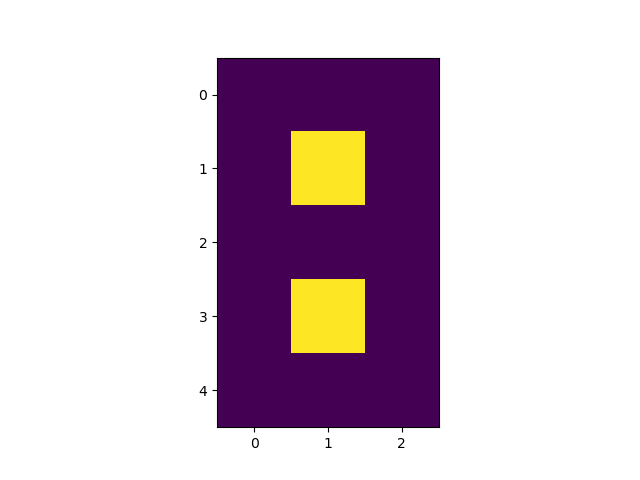

In [5]:
plt.imshow(image)
'''
Go from left to right
First coordinates -> rows
Second coordinates -> columns
0 1 2 
1
2

'''

In [6]:
# array of numbers that can be manipulated and visualized
print(image)

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


In [7]:
image[2,1] = 1

In [8]:
image

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

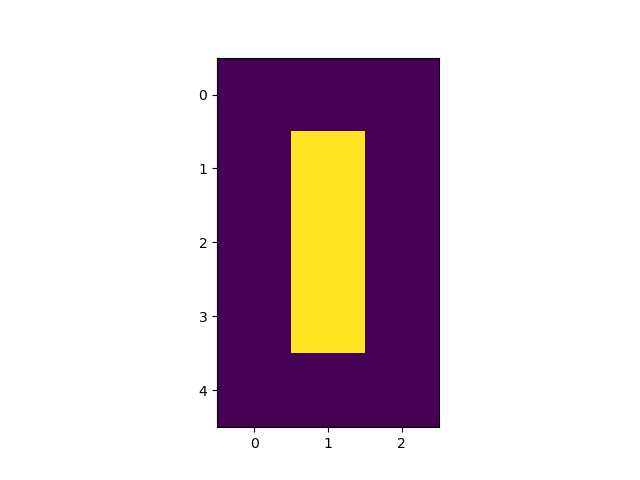

In [9]:
fig, ax = plt.subplots() #create subplots
plt.imshow(image)

In [10]:
# Creating a 5 from the above image
image[1,2] = 1
image[2,1] = 0
image[3,0] = 1

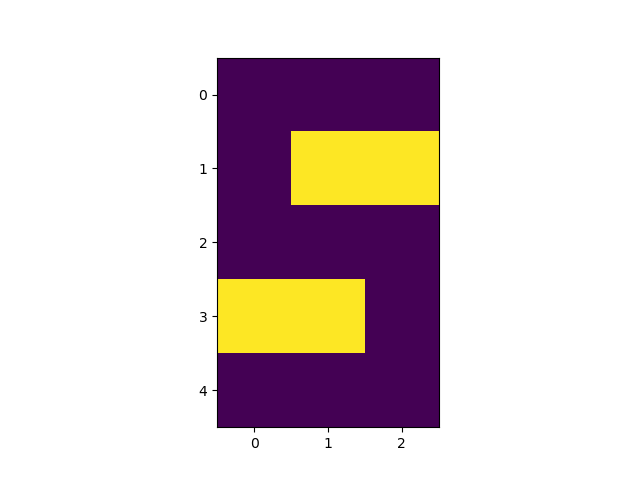

In [11]:
fig, ax = plt.subplots() #create subplots
plt.imshow(image)

It is not necessary to use a binary code. We can introduce other numbers foe example we can have 256 numbers to represent 256 colours.

In [12]:
three_colors = imread(fname="data/eight.tif")

In [13]:
#multiply the entire matrix with 128
three_colors = three_colors * 128

In [14]:
# set the middle row to 255., so you get values of 0., 128. and 255.
three_colors[2,:]=255.

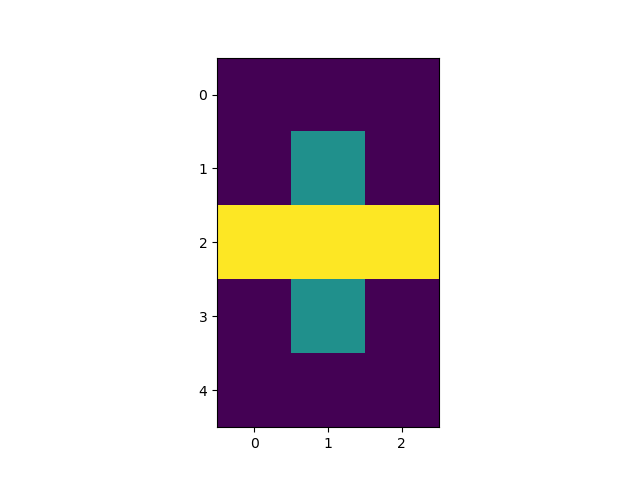

In [16]:
fig, ax = plt.subplots()
plt.imshow(three_colors)

All the above colors are in a deep purple or a yellow format. this is because of the cmap in the sklearn library. It can be changed as shown below:

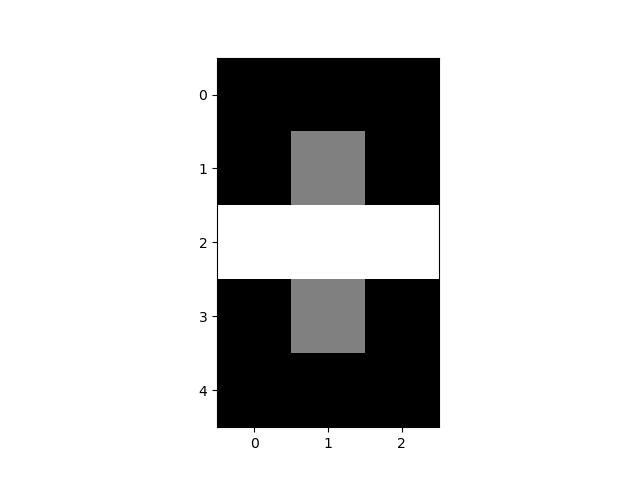

In [20]:
fig, ax = plt.subplots()
plt.imshow(three_colors, cmap= "gray") #mapping of numbers to colors on the screen is called cmap

In [22]:
pseudorandomizer = np.random.RandomState(2021) # to set seed for everyone to have the same thing

In [24]:
checkerboard = pseudorandomizer.randint(0,255,size=(4,4,3))

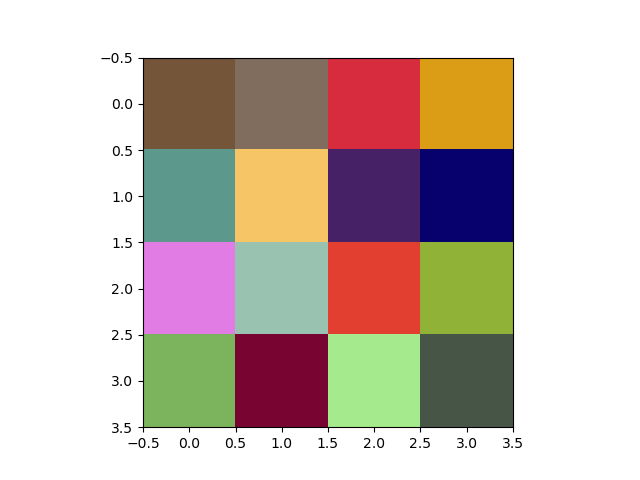

In [26]:
fig,ax = plt.subplots()
plt.imshow(checkerboard)

Each block represents three numbers for RGB. \
The number tells you how much of each color contributes to the cell. \
imshow knows that if it gets three numbers then it is a RGB convention. \
Because we have 3 colors in a channel and each color is 8 bits, it is a 24 bit depth channel.

In [27]:
print(checkerboard)

[[[116  85  57]
  [128 109  94]
  [214  44  62]
  [219 157  21]]

 [[ 93 152 140]
  [246 198 102]
  [ 70  33 101]
  [  7   1 110]]

 [[225 124 229]
  [154 194 176]
  [227  63  49]
  [144 178  54]]

 [[123 180  93]
  [120   5  49]
  [166 234 142]
  [ 71  85  70]]]


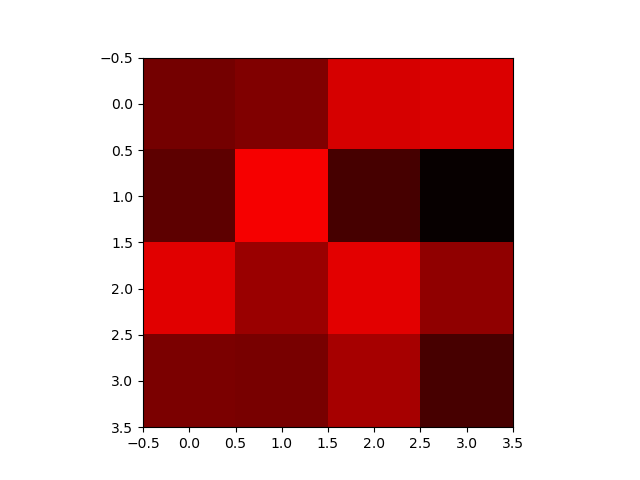

In [29]:
red_channel = checkerboard * [1,0,0]
fig, ax = plt.subplots()
plt.imshow(red_channel)

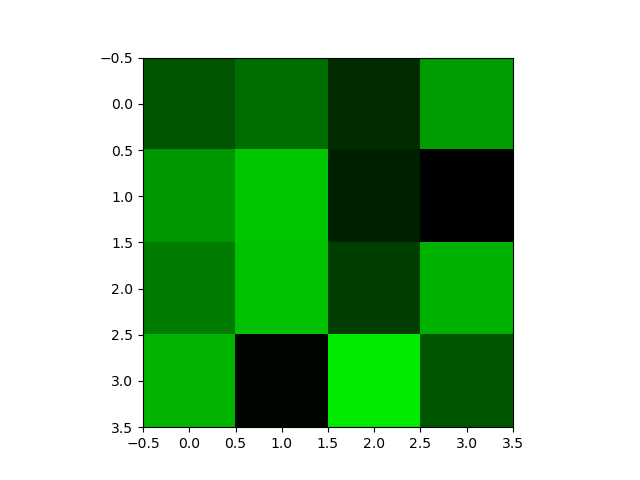

In [30]:
green_channel = checkerboard * [0,1,0]
fig, ax = plt.subplots()
plt.imshow(green_channel)

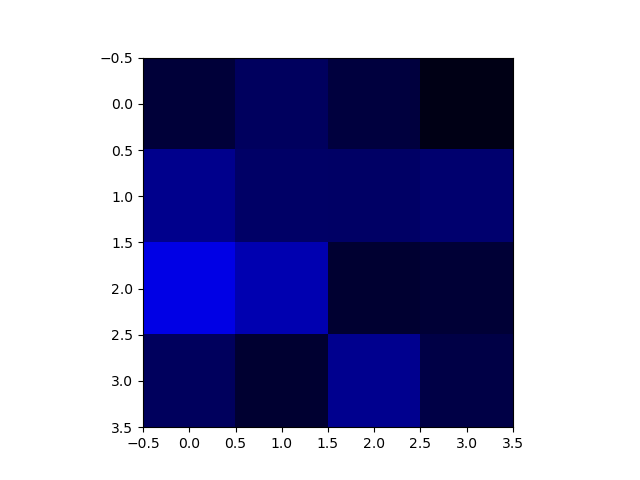

In [31]:
blue_channel = checkerboard * [0,0,1]
fig, ax = plt.subplots()
plt.imshow(blue_channel)

RGB is an additive color model. \
If all three are 255, then the cell is white. \
If all three are 0, then the cell is black. \
If all three are 128, the cell is neutral shade of gray.

#### Compression
**Lossless Compession** \
We'll store in a smaller memory but not actually lose any information.
ex: `zip`, `gz` archives

**Lossy Compression** \
Stores in a smaller format by discarding information from the original image.
ex: `jpeg`

For image analysis, compression can be dangerous. \
Dangerous due to loss of information:
- jpeg
- png (can be lossy and lossless) 
 
 `tif`, `png` and `jpeg` contain image metadata. \
 scikit will not give you that metadata so that gets lost when import an image.

There are many image processing libraries. The `skimage` is just one of them.

In [40]:
dim = 5000
img = np.zeros((dim,dim,3), dtype = "uint8")

img.fill(255)
skimage.io.imsave(fname="data/ws.bmp", arr=img) #scikit library implicity figures the file type from file name. Not all libraries do that.
skimage.io.imsave(fname="data/ws.jpg", arr=img)

C:\Users\getan\AppData\Local\Temp\ipykernel_16672\4008282480.py:5: UserWarning: data/ws.bmp is a low contrast image
  skimage.io.imsave(fname="data/ws.bmp", arr=img)
C:\Users\getan\AppData\Local\Temp\ipykernel_16672\4008282480.py:6: UserWarning: data/ws.jpg is a low contrast image
  skimage.io.imsave(fname="data/ws.jpg", arr=img)


In [41]:
! dir

 Volume in drive C is OS
 Volume Serial Number is F0D8-0677

 Directory of C:\Users\getan\Documents\PythonProjects\ImageProcessing

10/24/2022  02:49 PM    <DIR>          .
10/24/2022  12:33 PM    <DIR>          ..
10/24/2022  02:18 PM    <DIR>          .ipynb_checkpoints
10/24/2022  02:51 PM    <DIR>          data
10/24/2022  02:49 PM           191,348 Image Basics.ipynb
10/24/2022  01:52 PM           517,112 Initial Setup.ipynb
               2 File(s)        708,460 bytes
               4 Dir(s)  239,484,366,848 bytes free


In [51]:
!zip ./data/ws.zip ./data/ws.jpg

updating: data/ws.jpg (164 bytes security) (deflated 100%)


In [52]:
!dir data

 Volume in drive C is OS
 Volume Serial Number is F0D8-0677

 Directory of C:\Users\getan\Documents\PythonProjects\ImageProcessing\data

10/24/2022  02:59 PM    <DIR>          .
10/24/2022  02:58 PM    <DIR>          ..
10/24/2022  12:34 PM         2,363,654 beads.jpg
10/24/2022  12:34 PM           119,691 board.jpg
10/24/2022  12:34 PM               755 centers.txt
10/24/2022  12:34 PM         3,217,567 chair.jpg
10/24/2022  12:34 PM           278,308 colonies-01.tif
10/24/2022  12:34 PM           278,308 colonies-02.tif
10/24/2022  12:34 PM           278,308 colonies-03.tif
10/24/2022  12:34 PM               424 eight.tif
10/24/2022  12:34 PM             9,420 gaussian-original.png
10/24/2022  12:34 PM           192,351 maize-root-cluster.jpg
10/24/2022  12:34 PM           125,461 maize-roots-grayscale.jpg
10/24/2022  12:34 PM         1,920,216 maize-seedlings.tif
10/24/2022  12:34 PM           180,733 plant-seedling.jpg
10/24/2022  12:34 PM           909,352 remote-control.jpg
10/24

In [53]:
!zip ./data/ws.zip ./data/ws.bmp

updating: data/ws.bmp (164 bytes security) (deflated 100%)


In [54]:
!dir data

 Volume in drive C is OS
 Volume Serial Number is F0D8-0677

 Directory of C:\Users\getan\Documents\PythonProjects\ImageProcessing\data

10/24/2022  02:59 PM    <DIR>          .
10/24/2022  02:58 PM    <DIR>          ..
10/24/2022  12:34 PM         2,363,654 beads.jpg
10/24/2022  12:34 PM           119,691 board.jpg
10/24/2022  12:34 PM               755 centers.txt
10/24/2022  12:34 PM         3,217,567 chair.jpg
10/24/2022  12:34 PM           278,308 colonies-01.tif
10/24/2022  12:34 PM           278,308 colonies-02.tif
10/24/2022  12:34 PM           278,308 colonies-03.tif
10/24/2022  12:34 PM               424 eight.tif
10/24/2022  12:34 PM             9,420 gaussian-original.png
10/24/2022  12:34 PM           192,351 maize-root-cluster.jpg
10/24/2022  12:34 PM           125,461 maize-roots-grayscale.jpg
10/24/2022  12:34 PM         1,920,216 maize-seedlings.tif
10/24/2022  12:34 PM           180,733 plant-seedling.jpg
10/24/2022  12:34 PM           909,352 remote-control.jpg
10/24

The BMP file is 75 MB. \
The JPEG gile is 383 KB. \
The zip file is 71 KB. \
It is interesting thet you can get the smallest file size by using losless compression via zip. \
JPEG is not the best choice for analytics as it compresses the data by combining adjacent pixels, basically discarding information. \
TIFF images can be compressed using ether Lossly or Lossless compression but they are not universally readable by image viewing systems.